In [76]:
import os
import sys
src_dir = os.path.join('..', 'src')
sys.path.append(os.path.abspath(src_dir))
import yfinance as yf

from data import path, get_dataset, save_dataset

In [77]:
posts = get_dataset('dataset_1.00c.csv')
data = get_dataset('timeseries_v5.0.csv')
# data = data.sort_values(by=['created'])
data

../../data/datasets/dataset_1.00c.csv
../../data/datasets/timeseries_v5.0.csv


,post_id,datetime,new_comments,texts,cumulative
0,l0hnrw,2021-01-19 11:00:33,105.0,hi hi today fucking green gunna today fucking ...,105.0
1,l0hnrw,2021-01-19 11:10:33,62.0,die gang gme bb till die gang gme bb till time...,167.0
2,l0hnrw,2021-01-19 11:20:33,68.0,dropouts head listening pm trapt strong watchi...,235.0
3,l0hnrw,2021-01-19 11:30:33,84.0,deleted deleted ride bb ride bb open ashamed r...,319.0
4,l0hnrw,2021-01-19 11:40:33,60.0,insolvent make wsb mutual moment accidentally ...,379.0
...,...,...,...,...,...
2302843,l6yy64,2021-06-05 03:49:16,0.0,,0.0
2302844,l6yy64,2021-06-05 03:59:16,0.0,,0.0
2302845,l6yy64,2021-06-05 04:09:16,0.0,,0.0
2302846,l6yy64,2021-06-05 04:19:16,0.0,,0.0


In [78]:
import pandas as pd
data.datetime = pd.to_datetime(data.datetime)
data.datetime = data.datetime.astype('int64')

In [79]:
data.datetime = data.datetime.apply(lambda x: str(x)[:10])
data.datetime = data.datetime.astype('int64')
data

,post_id,datetime,new_comments,texts,cumulative
0,l0hnrw,1611054033,105.0,hi hi today fucking green gunna today fucking ...,105.0
1,l0hnrw,1611054633,62.0,die gang gme bb till die gang gme bb till time...,167.0
2,l0hnrw,1611055233,68.0,dropouts head listening pm trapt strong watchi...,235.0
3,l0hnrw,1611055833,84.0,deleted deleted ride bb ride bb open ashamed r...,319.0
4,l0hnrw,1611056433,60.0,insolvent make wsb mutual moment accidentally ...,379.0
...,...,...,...,...,...
2302843,l6yy64,1622864956,0.0,,0.0
2302844,l6yy64,1622865556,0.0,,0.0
2302845,l6yy64,1622866156,0.0,,0.0
2302846,l6yy64,1622866756,0.0,,0.0


In [80]:
posts.created = pd.to_datetime(posts.created)
posts.created = posts.created.astype('int64').apply(lambda x: int(str(x)[:10])).astype('int64')

In [86]:
posts_created = posts[['id', 'created']]
type(posts_created.iloc[0,1])

numpy.int64

In [35]:
tickerSymbol = 'GME'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(start='2021-1-19', end='2021-2-12', interval='1h')
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-01-19 09:30:00-05:00,40.634800,45.520000,36.639999,37.610001,34966133,0,0
2021-01-19 10:30:00-05:00,37.653702,39.480000,36.750000,38.480099,11234435,0,0
2021-01-19 11:30:00-05:00,38.487400,41.669998,38.000000,40.985001,9210651,0,0
2021-01-19 12:30:00-05:00,40.975201,42.299999,40.290001,40.970001,7621300,0,0
2021-01-19 13:30:00-05:00,40.970001,41.340000,39.660000,39.889999,3827122,0,0
...,...,...,...,...,...,...,...
2021-02-11 11:30:00-05:00,49.099998,50.268299,48.240002,48.400002,1561553,0,0
2021-02-11 12:30:00-05:00,48.400101,49.454601,48.230000,49.139999,1099170,0,0
2021-02-11 13:30:00-05:00,49.099800,49.740002,48.220100,48.910000,1011721,0,0
2021-02-11 14:30:00-05:00,48.900002,49.349998,48.509998,49.049999,597329,0,0


In [7]:
save_dataset(tickerDf, 'GME_stock.csv')

In [56]:
tickerDf.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,unix_time
count,126.000000,126.000000,126.000000,126.000000,1.260000e+02,126.0,126.0,1.260000e+02
mean,115.511291,128.149247,102.555516,113.131654,1.011792e+07,0.0,0.0,1.612071e+09
std,99.264730,113.126208,84.162079,96.389306,1.067379e+07,0.0,0.0,6.310572e+05
min,36.693001,38.799999,36.060001,36.709999,5.973290e+05,0.0,0.0,1.611067e+09
25%,49.188324,50.979924,48.322500,49.378302,3.506057e+06,0.0,0.0,1.611597e+09
50%,64.581501,70.499950,59.344999,63.635050,6.014306e+06,0.0,0.0,1.612071e+09
75%,121.767427,149.812500,105.417500,121.622501,1.266491e+07,0.0,0.0,1.612545e+09
max,397.859985,483.000000,320.000000,396.505005,6.069506e+07,0.0,0.0,1.613075e+09


In [57]:
tickerDf['unix_time'] = tickerDf.index.view('int64')

In [58]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,unix_time
2021-01-19 09:30:00-05:00,40.634800,45.520000,36.639999,37.610001,34966133,0,0,1611066600000000000
2021-01-19 10:30:00-05:00,37.653702,39.480000,36.750000,38.480099,11234435,0,0,1611070200000000000
2021-01-19 11:30:00-05:00,38.487400,41.669998,38.000000,40.985001,9210651,0,0,1611073800000000000
2021-01-19 12:30:00-05:00,40.975201,42.299999,40.290001,40.970001,7621300,0,0,1611077400000000000
2021-01-19 13:30:00-05:00,40.970001,41.340000,39.660000,39.889999,3827122,0,0,1611081000000000000
...,...,...,...,...,...,...,...,...
2021-02-11 11:30:00-05:00,49.099998,50.268299,48.240002,48.400002,1561553,0,0,1613061000000000000
2021-02-11 12:30:00-05:00,48.400101,49.454601,48.230000,49.139999,1099170,0,0,1613064600000000000
2021-02-11 13:30:00-05:00,49.099800,49.740002,48.220100,48.910000,1011721,0,0,1613068200000000000
2021-02-11 14:30:00-05:00,48.900002,49.349998,48.509998,49.049999,597329,0,0,1613071800000000000


In [59]:
tickerDf.unix_time = tickerDf.unix_time.apply(lambda x: int(str(x)[:10]))

In [60]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,unix_time
2021-01-19 09:30:00-05:00,40.634800,45.520000,36.639999,37.610001,34966133,0,0,1611066600
2021-01-19 10:30:00-05:00,37.653702,39.480000,36.750000,38.480099,11234435,0,0,1611070200
2021-01-19 11:30:00-05:00,38.487400,41.669998,38.000000,40.985001,9210651,0,0,1611073800
2021-01-19 12:30:00-05:00,40.975201,42.299999,40.290001,40.970001,7621300,0,0,1611077400
2021-01-19 13:30:00-05:00,40.970001,41.340000,39.660000,39.889999,3827122,0,0,1611081000
...,...,...,...,...,...,...,...,...
2021-02-11 11:30:00-05:00,49.099998,50.268299,48.240002,48.400002,1561553,0,0,1613061000
2021-02-11 12:30:00-05:00,48.400101,49.454601,48.230000,49.139999,1099170,0,0,1613064600
2021-02-11 13:30:00-05:00,49.099800,49.740002,48.220100,48.910000,1011721,0,0,1613068200
2021-02-11 14:30:00-05:00,48.900002,49.349998,48.509998,49.049999,597329,0,0,1613071800


In [75]:
posts_created.loc['created'] = posts_created.created.astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [74]:
type(posts_created.iloc[0,0])

str

In [61]:
tickerDf[tickerDf.High > 400]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,unix_time
2021-01-28 09:30:00-05:00,290.000000,483.000000,287.119995,396.505005,18660587,0,0,1611844200
2021-01-28 10:30:00-05:00,397.859985,403.999908,112.250000,132.000000,7547213,0,0,1611847800
2021-01-29 09:30:00-05:00,379.709991,413.980011,291.000000,315.000000,15536384,0,0,1611930600


In [107]:
t = min(data.datetime)
_5min  = 5*60
_10min = 10*60
t_max = max(data.datetime)

In [108]:
def match_nearest(x, column):
    return tickerDf.iloc[(tickerDf['unix_time']-x).abs().argsort()[:1]][column].values[0]

In [109]:
y     = []
x_gme = []
x_com = []
x_pos = []

i = 0
while t <= t_max:
    i+= 1
    if i % 20 == 0:
        print(t_max-t, "        ", end='\r', flush=True)

    gme_val    = match_nearest(t, 'High')
    n_comments = sum(data[ ((t - _5min) < data.datetime) & (data.datetime < (t + _5min))].groupby('post_id').first()['new_comments'])
    n_posts    = len(posts[((t - _5min) < posts.created) & (posts.created < (t + _5min))])
    
    y.append(t)
    x_gme.append(gme_val)
    x_com.append(n_comments)
    x_pos.append(n_posts)
    
    t += _10min
    

In [110]:
# gme_data = zip(tickerDf.unix_time.tolist(), tickerDf.High.tolist())

In [111]:
len(y)

19689

In [112]:
(max(data.datetime)-min(data.datetime))/600

19688.871666666666

NameError: name 'gme_data' is not defined

In [113]:
import matplotlib.pyplot as plt

In [114]:
import pandas as pd
import numpy as np
gme_to_com = pd.DataFrame(np.array([y, x_gme, x_com, x_pos]))

In [115]:
gme_to_com = gme_to_com.T
gme_to_com.columns = ['datetime', 'GME', 'new_comments', 'new_posts']
gme_to_com.datetime = pd.to_datetime(gme_to_com.datetime * 1000000000)

In [120]:
# gme_to_com.new_posts /= 10

In [130]:
gme_to_com.columns

Index(['datetime', 'GME', 'new_comments', 'new_posts'], dtype='object')

In [117]:
save_dataset(gme_to_com, 'gme_to_com_v2.0.csv')

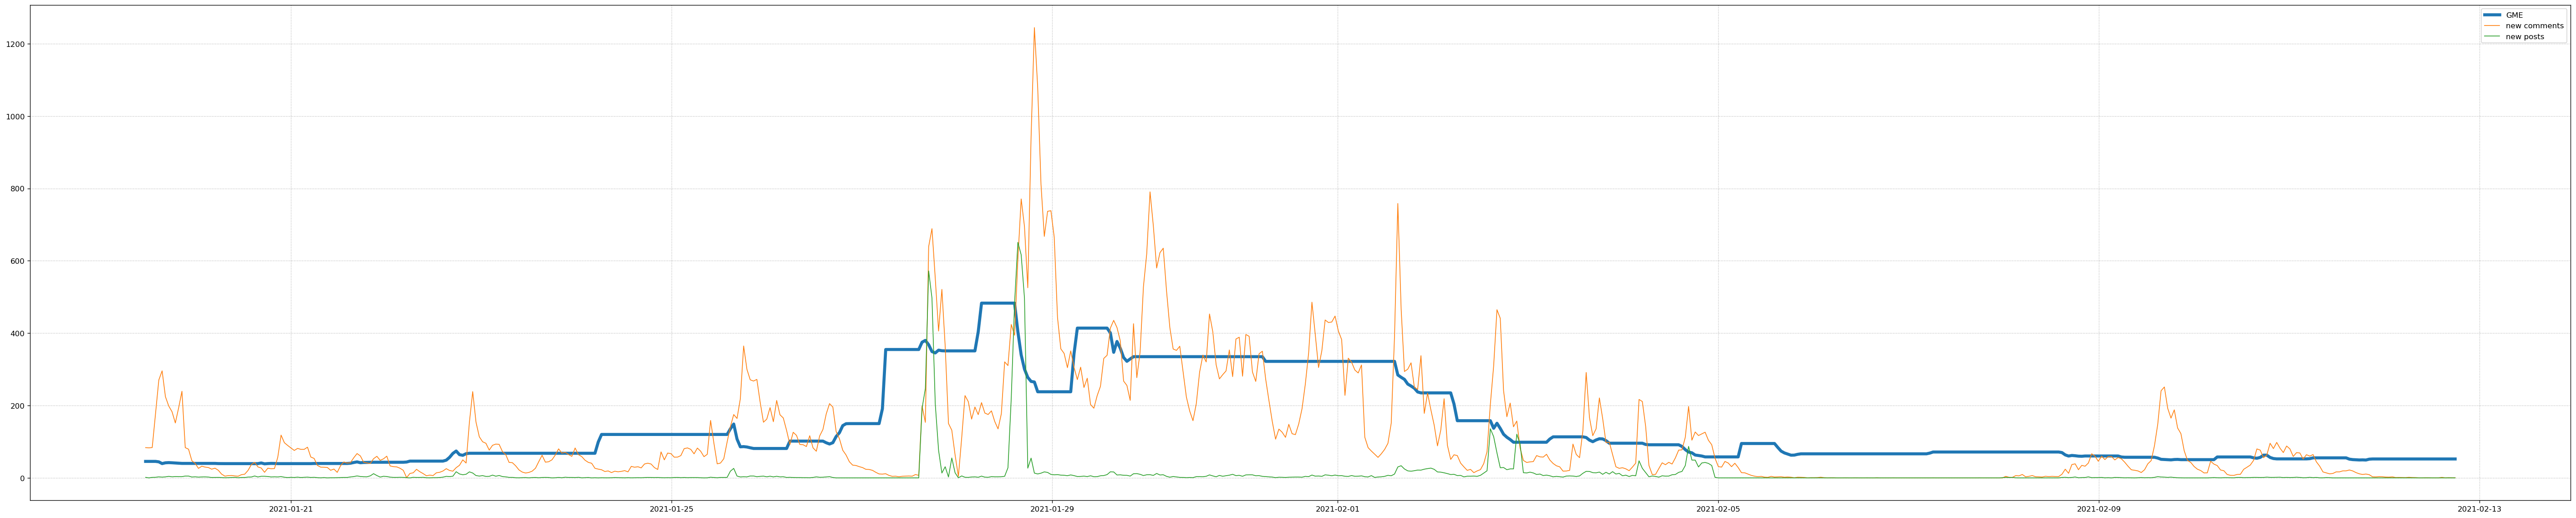

In [178]:
to_show = gme_to_com_2.iloc[:int(3500/5)]
plt.figure(figsize=(60, 12), dpi=120)
plt.plot(to_show.datetime, to_show.GME, linewidth=4, label='GME')
plt.plot(to_show.datetime, to_show.new_comments, linewidth=1, label='new comments')
plt.plot(to_show.datetime, to_show.new_posts, linewidth=1, label='new posts')
plt.grid(which='both', linestyle=":", alpha=1)
plt.legend()
plt.savefig('gme_comments_5.png')

In [137]:
def avg_gme_data(gme_data):
    step = 5
    res = []

    for i in range(0, gme_data.shape[0], 5):
        dat = gme_data.iloc[i:(i+step)]
        tim = np.mean(dat.datetime)
        gme = np.mean(dat.GME)
        com = np.mean(dat.new_comments)
        pos = np.mean(dat.new_posts)
        
        res.append([tim, gme, com, pos])
    
    return pd.DataFrame(np.array(res), columns=gme_data.columns)

In [138]:
gme_to_com_2 = avg_gme_data(gme_to_com)

In [187]:
new_dataset = get_dataset('dataset_1.01.csv')

../../data/datasets/dataset_1.01.csv


In [190]:
new_dataset[['id','created','num_comments','gme_price']]

,id,created,num_comments,gme_price
0,l0hnrw,2021-01-19 11:00:21,23450,45.52
1,l0hqt1,2021-01-19 11:05:42,30,45.52
2,l0hw41,2021-01-19 11:16:33,24,45.52
3,l0i42t,2021-01-19 11:32:49,70,45.52
4,l0i84t,2021-01-19 11:41:18,140,45.52
...,...,...,...,...
38903,lhh01d,2021-02-11 09:17:58,18,55.32
38904,lhh7co,2021-02-11 09:32:23,141,55.32
38905,lhhgxm,2021-02-11 09:51:35,46,55.32
38906,lhhgyf,2021-02-11 09:51:37,52,55.32


In [189]:
new_dataset.created = pd.to_datetime(new_dataset.created * 1000000000)

In [191]:
new_dataset = new_dataset.sort_values(by='created')

In [192]:
new_dataset[['id','created','num_comments','gme_price']]

,id,created,num_comments,gme_price
0,l0hnrw,2021-01-19 11:00:21,23450,45.52
1,l0hqt1,2021-01-19 11:05:42,30,45.52
2,l0hw41,2021-01-19 11:16:33,24,45.52
3,l0i42t,2021-01-19 11:32:49,70,45.52
4,l0i84t,2021-01-19 11:41:18,140,45.52
...,...,...,...,...
38903,lhh01d,2021-02-11 09:17:58,18,55.32
38904,lhh7co,2021-02-11 09:32:23,141,55.32
38905,lhhgxm,2021-02-11 09:51:35,46,55.32
38906,lhhgyf,2021-02-11 09:51:37,52,55.32


In [196]:
new_dataset.gme_price *= 10

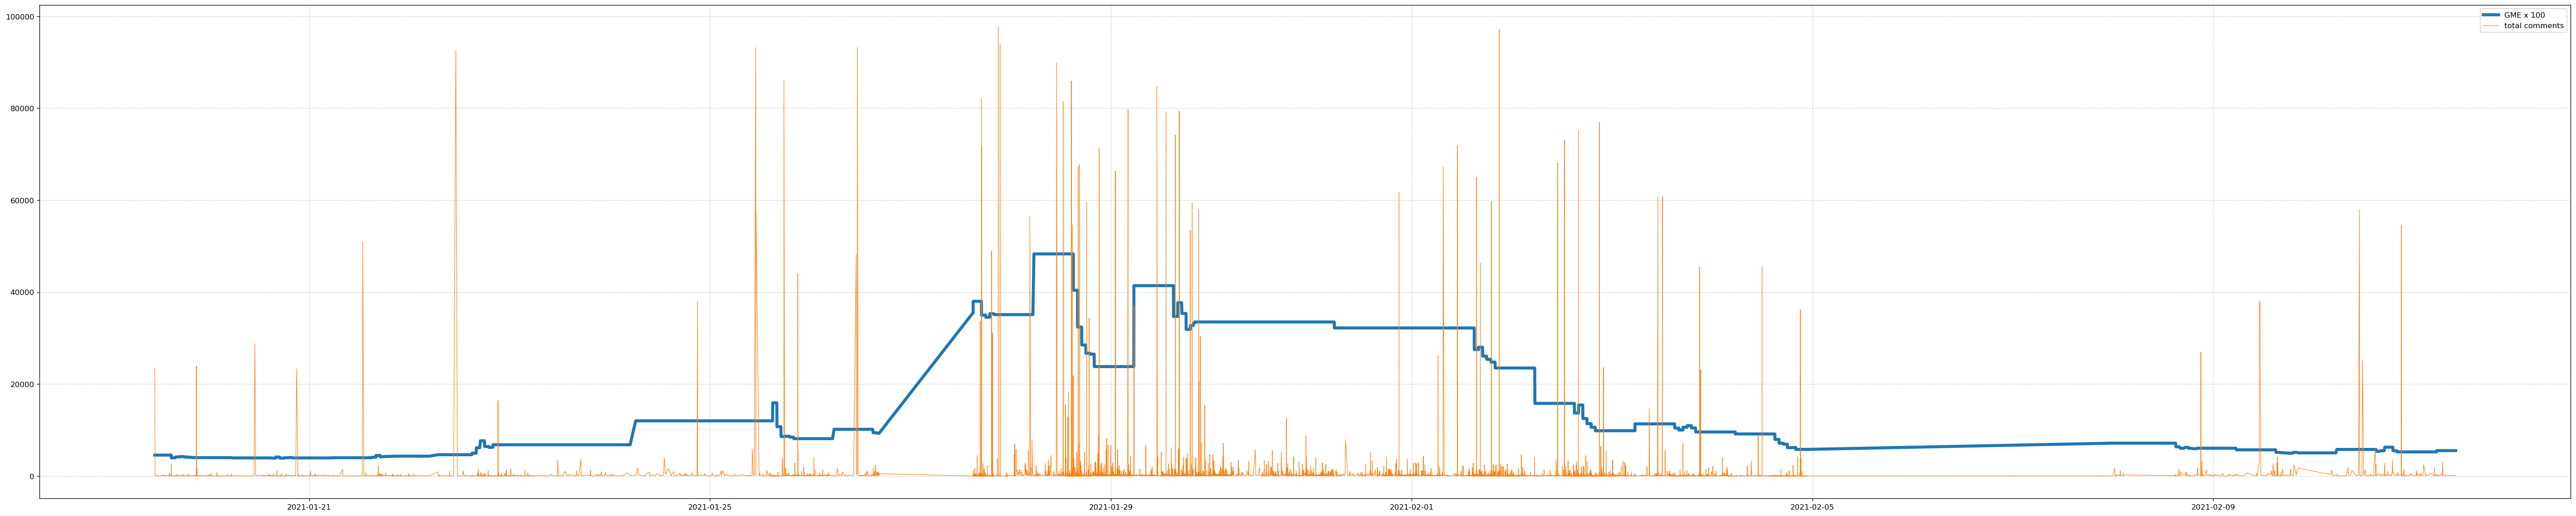

In [203]:
to_show = new_dataset
plt.figure(figsize=(60, 12), dpi=120)
plt.plot(to_show.created, to_show.gme_price, linewidth=4, label='GME x 100')
plt.plot(to_show.created, to_show.num_comments, linewidth=0.7, label='total comments')
# plt.plot(to_show.created, to_show.new_posts, linewidth=1, label='new posts')
plt.grid(which='both', linestyle=":", alpha=1)
plt.legend()
plt.savefig('gme_comments_total.png')

In [13]:
def match_nearest(x, column):
    return tickerDf.iloc[(tickerDf['unix_time']-x).abs().argsort()[:1]][column].values[0]

In [14]:
match_nearest(data.created[0], 'High')

45.52000045776367

In [134]:
# data.loc[:, 'gme_price'] = data.created.apply(lambda x: match_nearest(x, 'High'))
# data.loc[:, 'gme_volume'] = data.created.apply(lambda x: match_nearest(x, 'Volume'))
# data

In [ ]:
save_dataset(data, 'dataset_1.00a.csv')

In [57]:
from dataprep import split, preprocess

In [55]:
temp = get_dataset('data_0.99b.csv')
data['ocr_text'] = temp.ocr_text

../../data/datasets/data_0.99b.csv


In [62]:
train, test = split(data)
train, test = preprocess(train, test)
train

Removed 705 rows while filtering 0.98 quantile of words_in_body_count
Removed 687 rows while filtering 0.98 quantile of title_capital_letters_count
Removed 682 rows while filtering 0.98 quantile of body_capital_letters_count
Original rows: 35017, rows after preprocessing: 32943
Dataframe reduced by: 6.30%


,score,title_tokens,body_tokens,body_emojis,title_emojis,ocr_text,is_oc,is_self,sin_time,cos_time,...,body_capital_letters_ratio,body_urls_count,title_emoji_count,title_emojis_ratio,body_emoji_count,body_emojis_ratio,title_sentiment,body_sentiment,gme_price,gme_volume
13154,2,price gme limit,,,,,False,True,-0.842984,-0.537939,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,1.000000,0.292262
22556,185331,friends runs deep,,,,rudy betray arudy betray remember senator get ...,False,False,-0.293907,0.955834,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.5209,0.0000,0.448424,0.037349
34629,8,tdameritrade fuck,https,,,,False,True,-0.992258,0.124197,...,0.244,0.000000,0.0,0.0,0.0,0.0,0.4939,0.0000,0.700563,0.106213
34383,6,sub fucking love,following apart gains around gme common insane...,,,,False,True,-0.993524,0.113619,...,0.125,0.000000,0.0,0.0,0.0,0.0,0.5673,0.0000,0.700563,0.106213
16009,74,amc bros,fidelity morn hold selling buy,,,,False,True,-0.940424,-0.340003,...,0.155,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.822152,0.105145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,25,hit like wsb melvin looking point crashing bac...,yall tradeing let shut looks needs order mins ...,,,,False,True,-0.916784,-0.399383,...,0.019,0.000000,0.0,0.0,0.0,0.0,0.4329,-0.6369,0.768122,0.302233
33478,9,capital sec melvin fake incoming news cnbc,manipulate tweeter link short video cap media ...,,,,False,True,-0.999627,-0.027297,...,0.035,0.034483,0.0,0.0,0.0,0.0,-0.4767,0.2960,0.768122,0.173535
10334,6,amc drop night nok prices,trading work curious market,,,,False,True,-0.661741,-0.749732,...,0.000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,1.000000,0.292262
6398,165,hands shakeout paper good thing,rides helps fact short shares squeeze folding ...,,,,False,True,0.067867,-0.997694,...,0.010,0.000000,0.0,0.0,0.0,0.0,0.1531,0.7621,0.118640,0.160892


In [63]:
data.gme_price[13154]

483.0

In [64]:
save_dataset(data, 'dataset_1.00b.csv')